Sección 1: Montar Google Drive y cargar el archivo

In [15]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo de audio en Google Drive (modifícala según tu estructura)
audio_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test.wav"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sección 2: Leer el archivo de audio

In [30]:
import numpy as np
import wave

# Leer el archivo de audio
with wave.open(audio_path, 'r') as wav_file:
    sample_rate = wav_file.getframerate()
    num_canales = wav_file.getnchannels()
    num_frames = wav_file.getnframes()
    signal = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

    # Si es estéreo o más canales, reformateamos
    if num_canales > 1:
        signal = signal.reshape(-1, num_canales)

# Imprimir detalles del audio
print(f"Frecuencia de muestreo: {sample_rate} Hz")
print(f"Duración del audio: {num_frames / sample_rate} s")
print(f"Número de canales: {num_canales}")

Frecuencia de muestreo: 44100 Hz
Duración del audio: 2.0 s
Número de canales: 2


Sección 3: Graficar la señal original

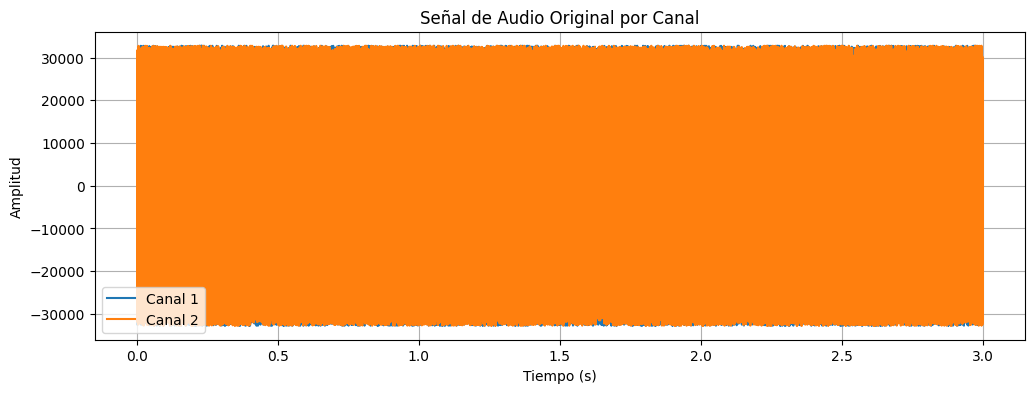

In [32]:
# Sección 3: Graficar la señal original
plt.figure(figsize=(12, 4))

# Crear el eje de tiempo con la cantidad real de muestras
tiempo = np.linspace(0, signal.shape[0] / sample_rate, num=signal.shape[0])

for canal in range(num_canales):
    plt.plot(tiempo, signal[:, canal], label=f'Canal {canal+1}')

plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal de Audio Original por Canal")
plt.legend()
plt.grid()
plt.show()

Sección 4: Aplicar Ventaneo

In [33]:
# Sección 4: Ventaneo de la señal
tiempo_ventaneo = 0.5  # en segundos
muestras_ventana = int(tiempo_ventaneo * sample_rate)
num_ventanas = num_frames // muestras_ventana  # Usamos num_frames en lugar de len(signal)

print(f"Total de muestras: {num_frames}")
print(f"Muestras por ventana: {muestras_ventana}")
print(f"Número de ventanas calculado: {num_ventanas}")

# Crear array para la señal modificada
signal_modificada = np.zeros_like(signal)

Total de muestras: 88200
Muestras por ventana: 22050
Número de ventanas calculado: 4


Sección 5: Graficar cada ventana antes de modificarla

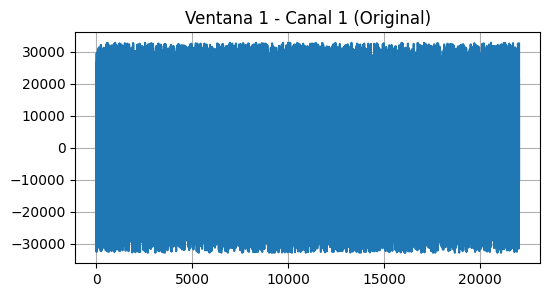

Exception ignored in: <function Wave_write.__del__ at 0x7f25984d34c0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/wave.py", line 447, in __del__
    self.close()
  File "/usr/lib/python3.11/wave.py", line 565, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.11/wave.py", line 588, in _ensure_header_written
    self._write_header(datasize)
  File "/usr/lib/python3.11/wave.py", line 592, in _write_header
    self._file.write(b'RIFF')
ValueError: I/O operation on closed file.


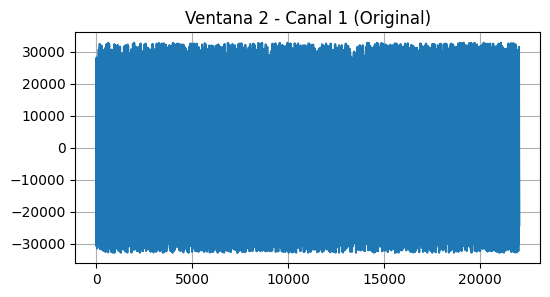

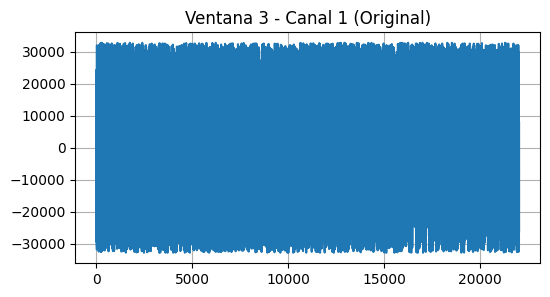

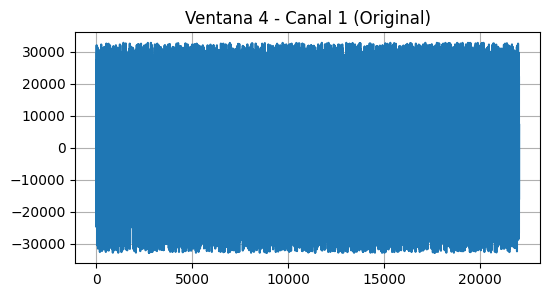

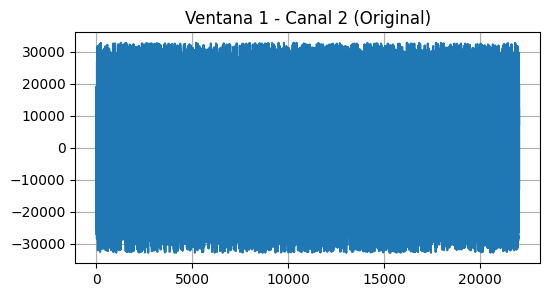

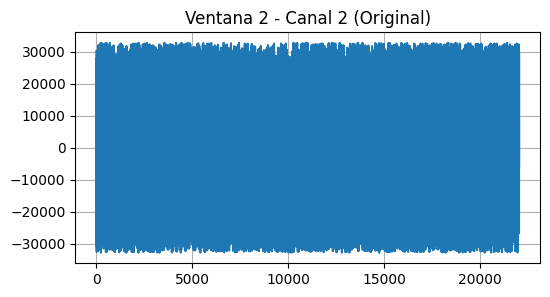

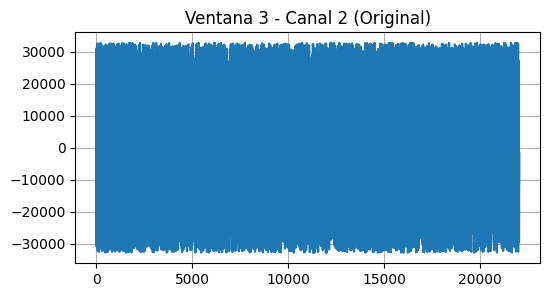

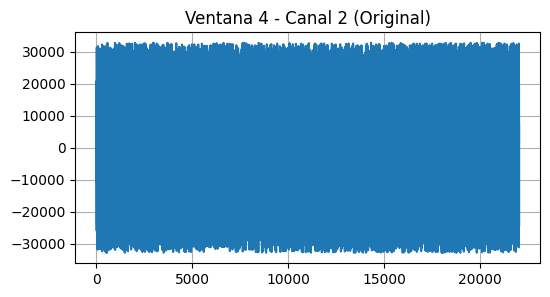

In [34]:
# Sección 5: Procesamiento por ventanas en cada canal
for canal in range(num_canales):
    for i in range(num_ventanas):
        inicio = i * muestras_ventana
        fin = inicio + muestras_ventana
        ventana = signal[inicio:fin, canal] if num_canales > 1 else signal[inicio:fin]

        # Graficar cada ventana antes de modificarla
        plt.figure(figsize=(6, 3))
        plt.plot(ventana)
        plt.title(f"Ventana {i+1} - Canal {canal+1} (Original)")
        plt.grid()
        plt.show()

        # Multiplicar cada ventana por el factor a = 0.8
        ventana_modificada = ventana * 0.8

        # Calcular la transformada de Fourier manualmente
        Zxx = np.fft.fft(ventana_modificada)

        # Transponer la matriz de la transformada de Fourier
        Zxx_transpuesta = Zxx.T

        # Volver a calcular la señal con la inversa de Fourier
        señal_recuperada = np.fft.ifft(Zxx_transpuesta.T).real

        # Insertar la ventana recuperada en la señal modificada
        signal_modificada[inicio:fin, canal] = señal_recuperada[:muestras_ventana] if num_canales > 1 else señal_recuperada[:muestras_ventana]

Sección 6: Modificar cada ventana y aplicar Transformada de Fourier
Multiplicamos cada ventana por 0.8 y aplicamos la FFT.

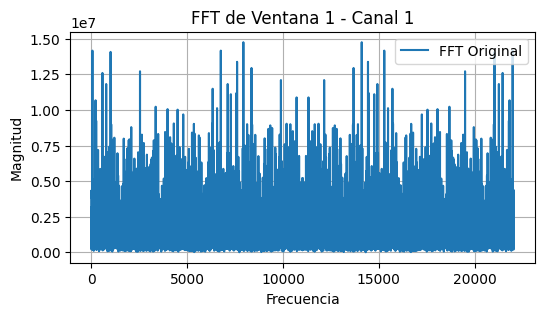

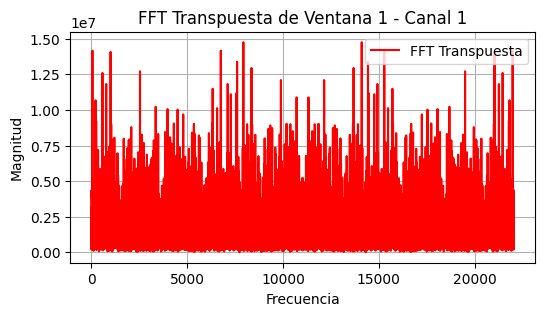

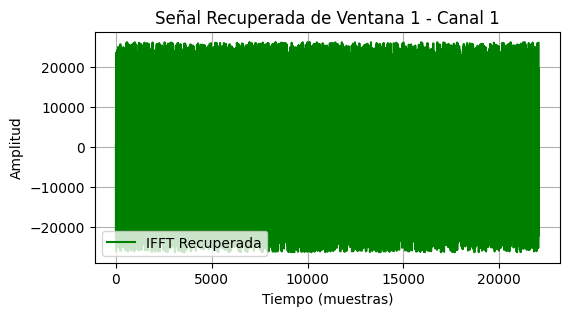

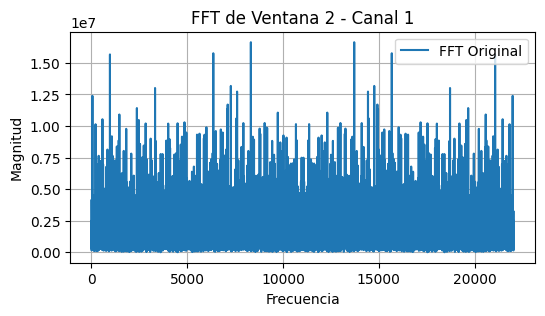

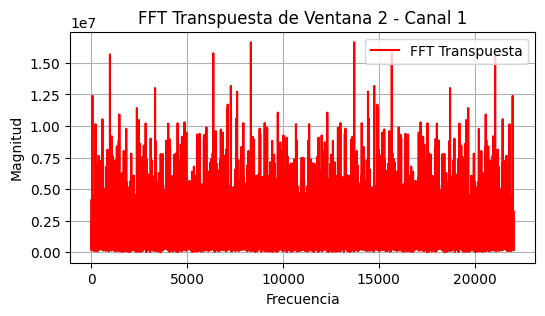

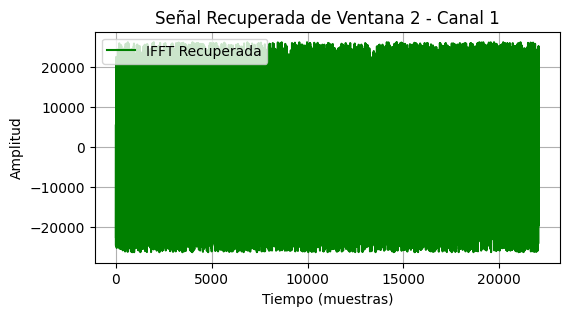

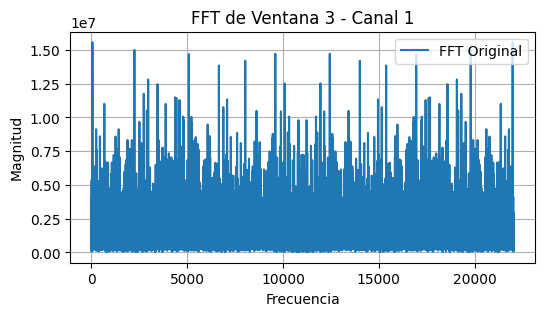

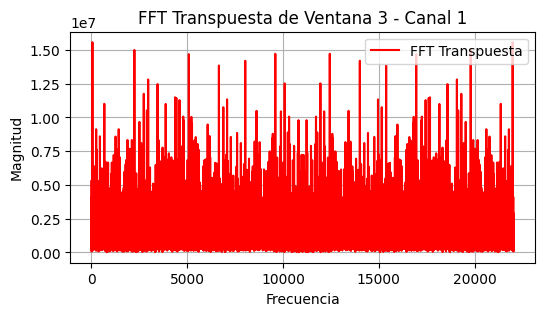

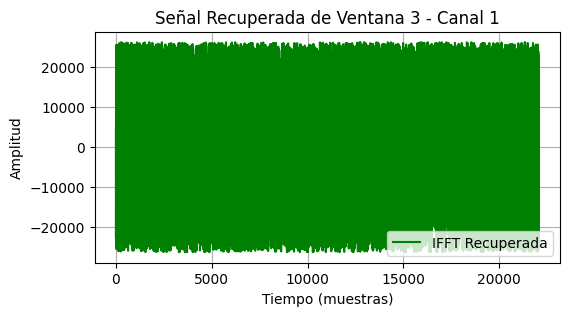

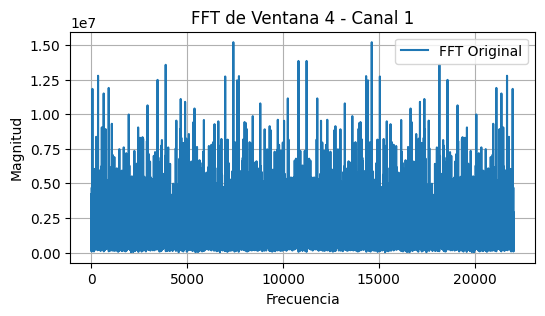

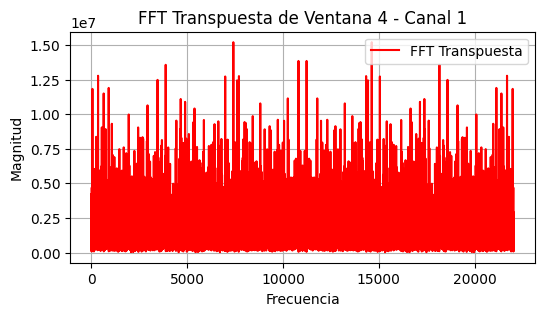

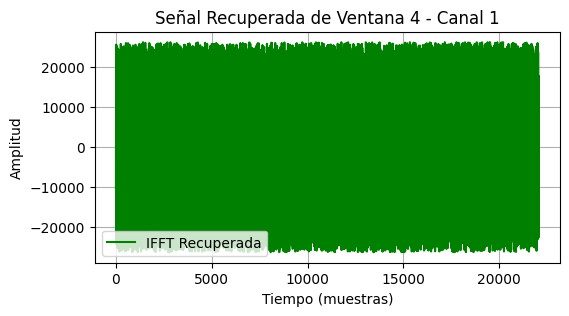

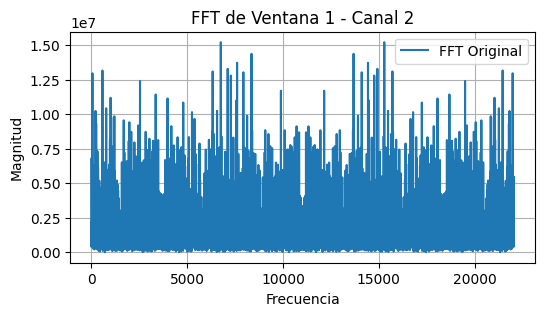

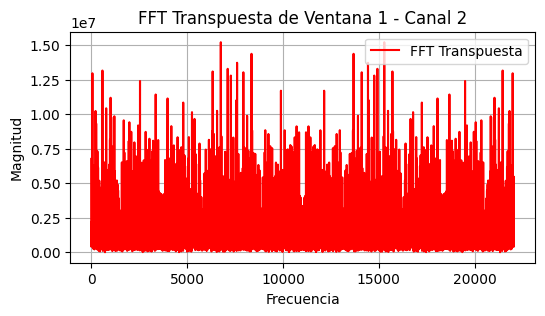

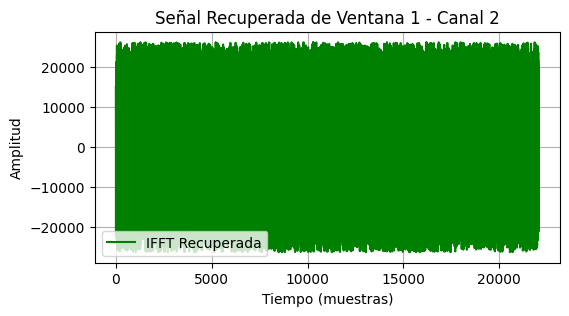

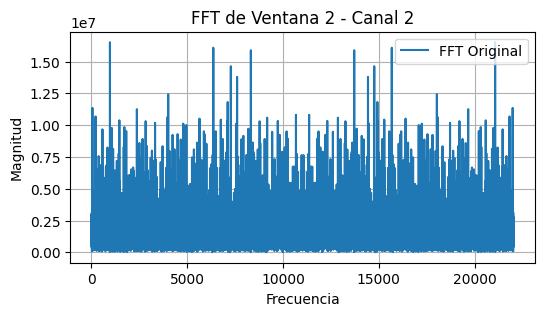

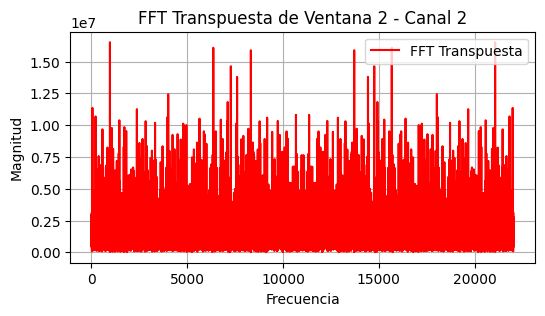

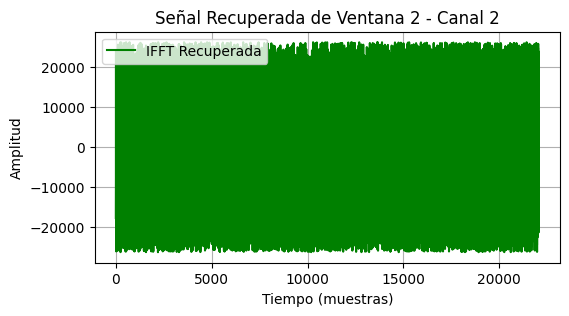

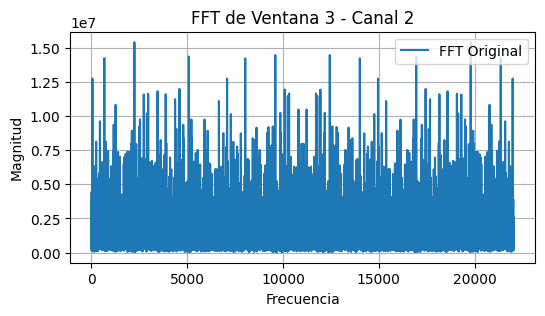

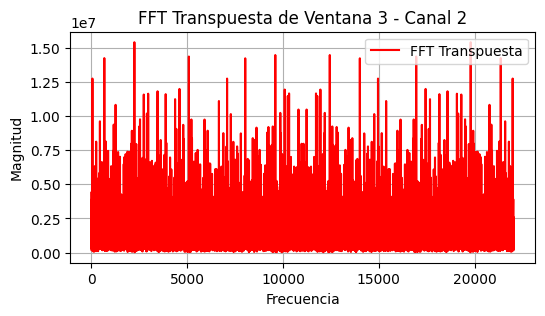

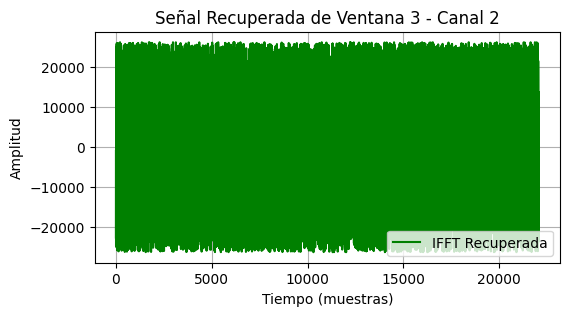

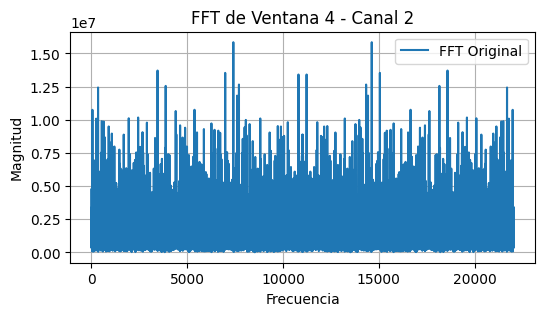

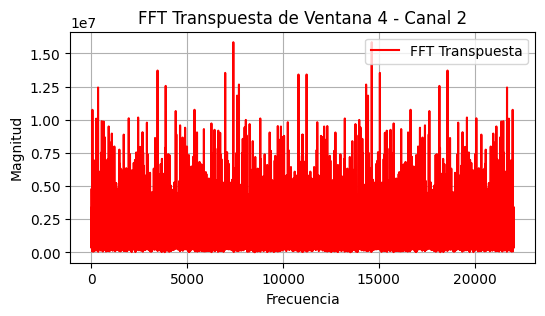

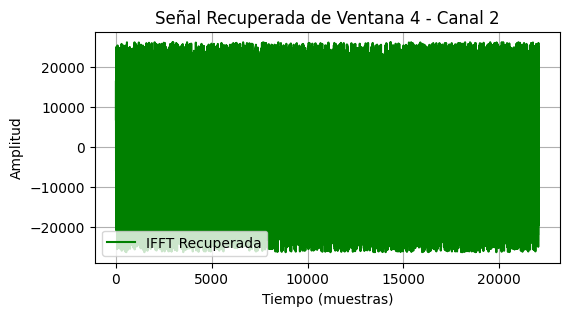

In [37]:
# Crear array para la señal modificada
signal_modificada = np.zeros_like(signal)

for canal in range(num_canales):
    for i in range(num_ventanas):
        inicio = i * muestras_ventana
        fin = inicio + muestras_ventana
        ventana = signal[inicio:fin, canal] if num_canales > 1 else signal[inicio:fin]

        # Multiplicar cada ventana por el factor a = 0.8
        ventana_modificada = ventana * 0.8

        # Calcular la transformada de Fourier
        Zxx = np.fft.fft(ventana_modificada)

        # Graficar la transformada de Fourier antes de transponer
        plt.figure(figsize=(6, 3))
        plt.plot(np.abs(Zxx), label="FFT Original")
        plt.xlabel("Frecuencia")
        plt.ylabel("Magnitud")
        plt.title(f"FFT de Ventana {i+1} - Canal {canal+1}")
        plt.legend()
        plt.grid()
        plt.show()

        # Transponer la matriz de la transformada de Fourier
        Zxx_transpuesta = Zxx.T

        # Graficar la transformada de Fourier después de transponer
        plt.figure(figsize=(6, 3))
        plt.plot(np.abs(Zxx_transpuesta), label="FFT Transpuesta", color='r')
        plt.xlabel("Frecuencia")
        plt.ylabel("Magnitud")
        plt.title(f"FFT Transpuesta de Ventana {i+1} - Canal {canal+1}")
        plt.legend()
        plt.grid()
        plt.show()

        # Volver a calcular la señal con la inversa de Fourier
        señal_recuperada = np.fft.ifft(Zxx_transpuesta.T).real

        # Graficar la señal recuperada después de la IFFT
        plt.figure(figsize=(6, 3))
        plt.plot(señal_recuperada, label="IFFT Recuperada", color='g')
        plt.xlabel("Tiempo (muestras)")
        plt.ylabel("Amplitud")
        plt.title(f"Señal Recuperada de Ventana {i+1} - Canal {canal+1}")
        plt.legend()
        plt.grid()
        plt.show()

        # Insertar la ventana recuperada en la señal modificada
        signal_modificada[inicio:fin, canal] = señal_recuperada[:muestras_ventana] if num_canales > 1 else señal_recuperada[:muestras_ventana]

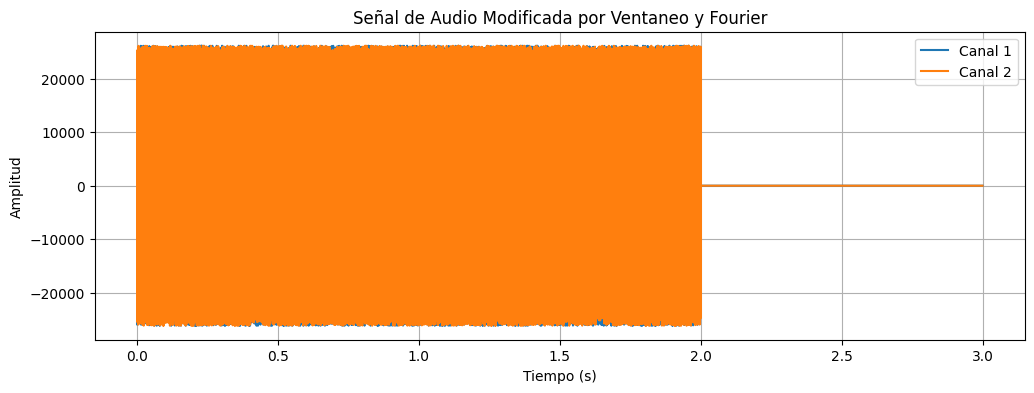

In [38]:
plt.figure(figsize=(12, 4))
for canal in range(num_canales):
    plt.plot(np.linspace(0, len(signal_modificada)/sample_rate, num=len(signal_modificada)),
             signal_modificada[:, canal], label=f'Canal {canal+1}')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal de Audio Modificada por Ventaneo y Fourier")
plt.legend()
plt.grid()
plt.show()

AAAAAAAAAAAAAAAA


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


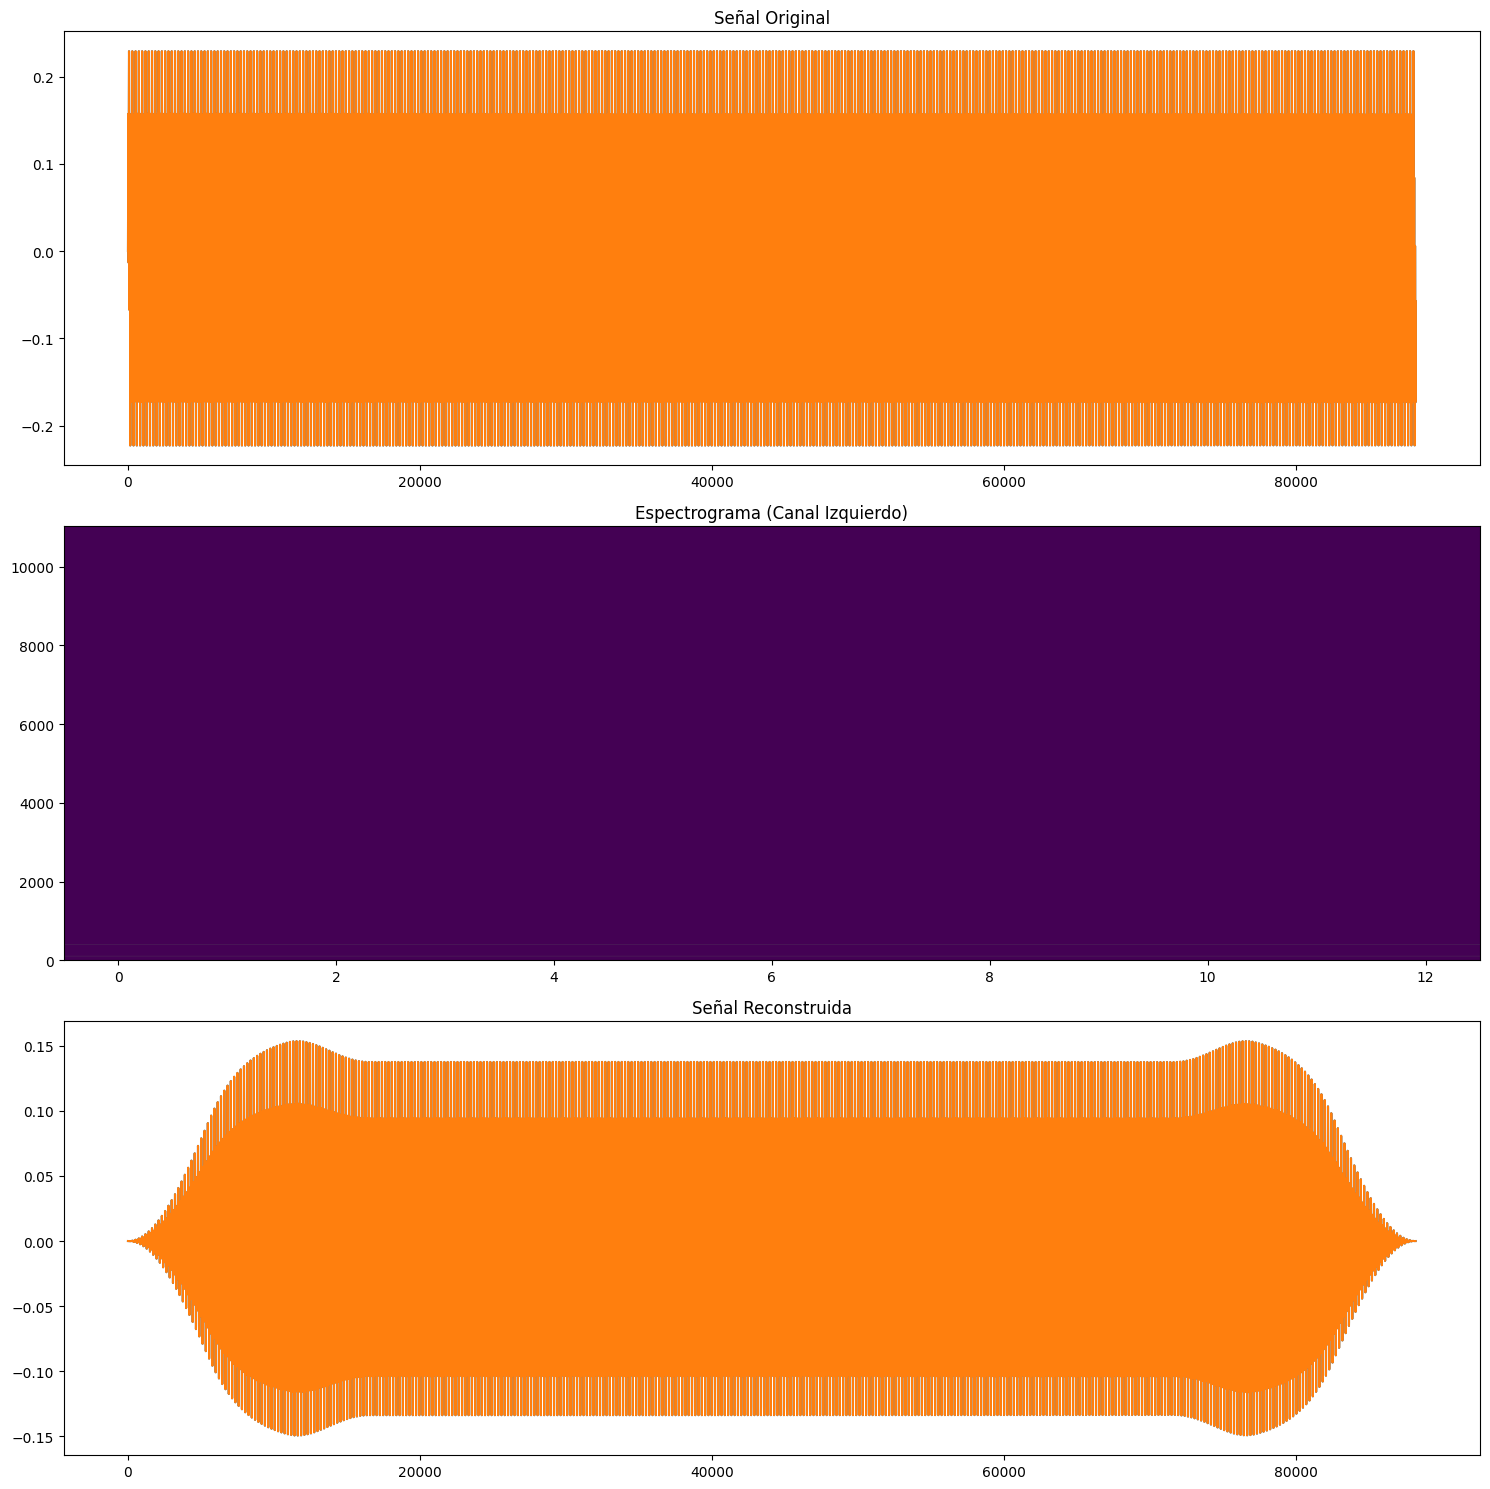

In [43]:
# Sección 1: Importar y montar Drive
import numpy as np
from google.colab import drive
from scipy.io import wavfile
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Sección 2: Funciones de procesamiento
def apply_hanning_window(frame):
    N = len(frame)
    window = 0.5 * (1 - np.cos(2 * np.pi * np.arange(N) / (N - 1)))
    if len(frame.shape) > 1:  # Para audio estéreo
        return frame * window[:, np.newaxis]
    return frame * window

def stft(signal, window_size, hop_length):
    if len(signal.shape) > 1:  # Audio estéreo
        n_channels = signal.shape[1]
        n_frames = 1 + (len(signal) - window_size) // hop_length
        stft_matrix = np.zeros((window_size // 2 + 1, n_frames, n_channels), dtype=complex)

        for channel in range(n_channels):
            for i in range(n_frames):
                start = i * hop_length
                frame = signal[start:start + window_size, channel]
                windowed_frame = apply_hanning_window(frame)
                fft_frame = np.fft.rfft(windowed_frame)
                stft_matrix[:, i, channel] = fft_frame
    else:  # Audio mono
        n_frames = 1 + (len(signal) - window_size) // hop_length
        stft_matrix = np.zeros((window_size // 2 + 1, n_frames), dtype=complex)

        for i in range(n_frames):
            start = i * hop_length
            frame = signal[start:start + window_size]
            windowed_frame = apply_hanning_window(frame)
            fft_frame = np.fft.rfft(windowed_frame)
            stft_matrix[:, i] = fft_frame

    return stft_matrix

def istft(stft_matrix, window_size, hop_length, signal_length):
    if len(stft_matrix.shape) > 2:  # Audio estéreo
        n_channels = stft_matrix.shape[2]
        reconstructed = np.zeros((signal_length, n_channels))
        window_sum = np.zeros((signal_length, n_channels))
        window = apply_hanning_window(np.ones(window_size))

        for channel in range(n_channels):
            for i in range(stft_matrix.shape[1]):
                start = i * hop_length
                frame = np.fft.irfft(stft_matrix[:, i, channel])
                frame = frame * window
                end = start + window_size
                reconstructed[start:end, channel] += frame
                window_sum[start:end, channel] += window

        nonzero = window_sum > 1e-10
        reconstructed[nonzero] /= window_sum[nonzero]
    else:  # Audio mono
        n_frames = stft_matrix.shape[1]
        reconstructed = np.zeros(signal_length)
        window_sum = np.zeros(signal_length)
        window = apply_hanning_window(np.ones(window_size))

        for i in range(n_frames):
            start = i * hop_length
            frame = np.fft.irfft(stft_matrix[:, i])
            frame = frame * window
            end = start + window_size
            reconstructed[start:end] += frame
            window_sum[start:end] += window

        nonzero = window_sum > 1e-10
        reconstructed[nonzero] /= window_sum[nonzero]

    return reconstructed

# Sección 3: Cargar y procesar audio
audio_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test.wav"
sr, audio = wavfile.read(audio_path)
audio = audio.astype(float) / np.iinfo(audio.dtype).max

# Parámetros
window_time = 0.5
window_size = int(window_time * sr)
hop_length = window_size // 4
alpha = 0.8

# Aplicar modificación
modified_audio = audio * alpha

# Sección 4: STFT y reconstrucción
stft_result = stft(modified_audio, window_size, hop_length)
reconstructed = istft(stft_result, window_size, hop_length, len(audio))

# Sección 5: Visualización
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.title('Señal Original')
plt.plot(audio)

plt.subplot(3, 1, 2)
plt.title('Espectrograma (Canal Izquierdo)')
plt.imshow(np.abs(stft_result[:, :, 0]), aspect='auto', origin='lower')

plt.subplot(3, 1, 3)
plt.title('Señal Reconstruida')
plt.plot(reconstructed)

plt.tight_layout()
plt.show()

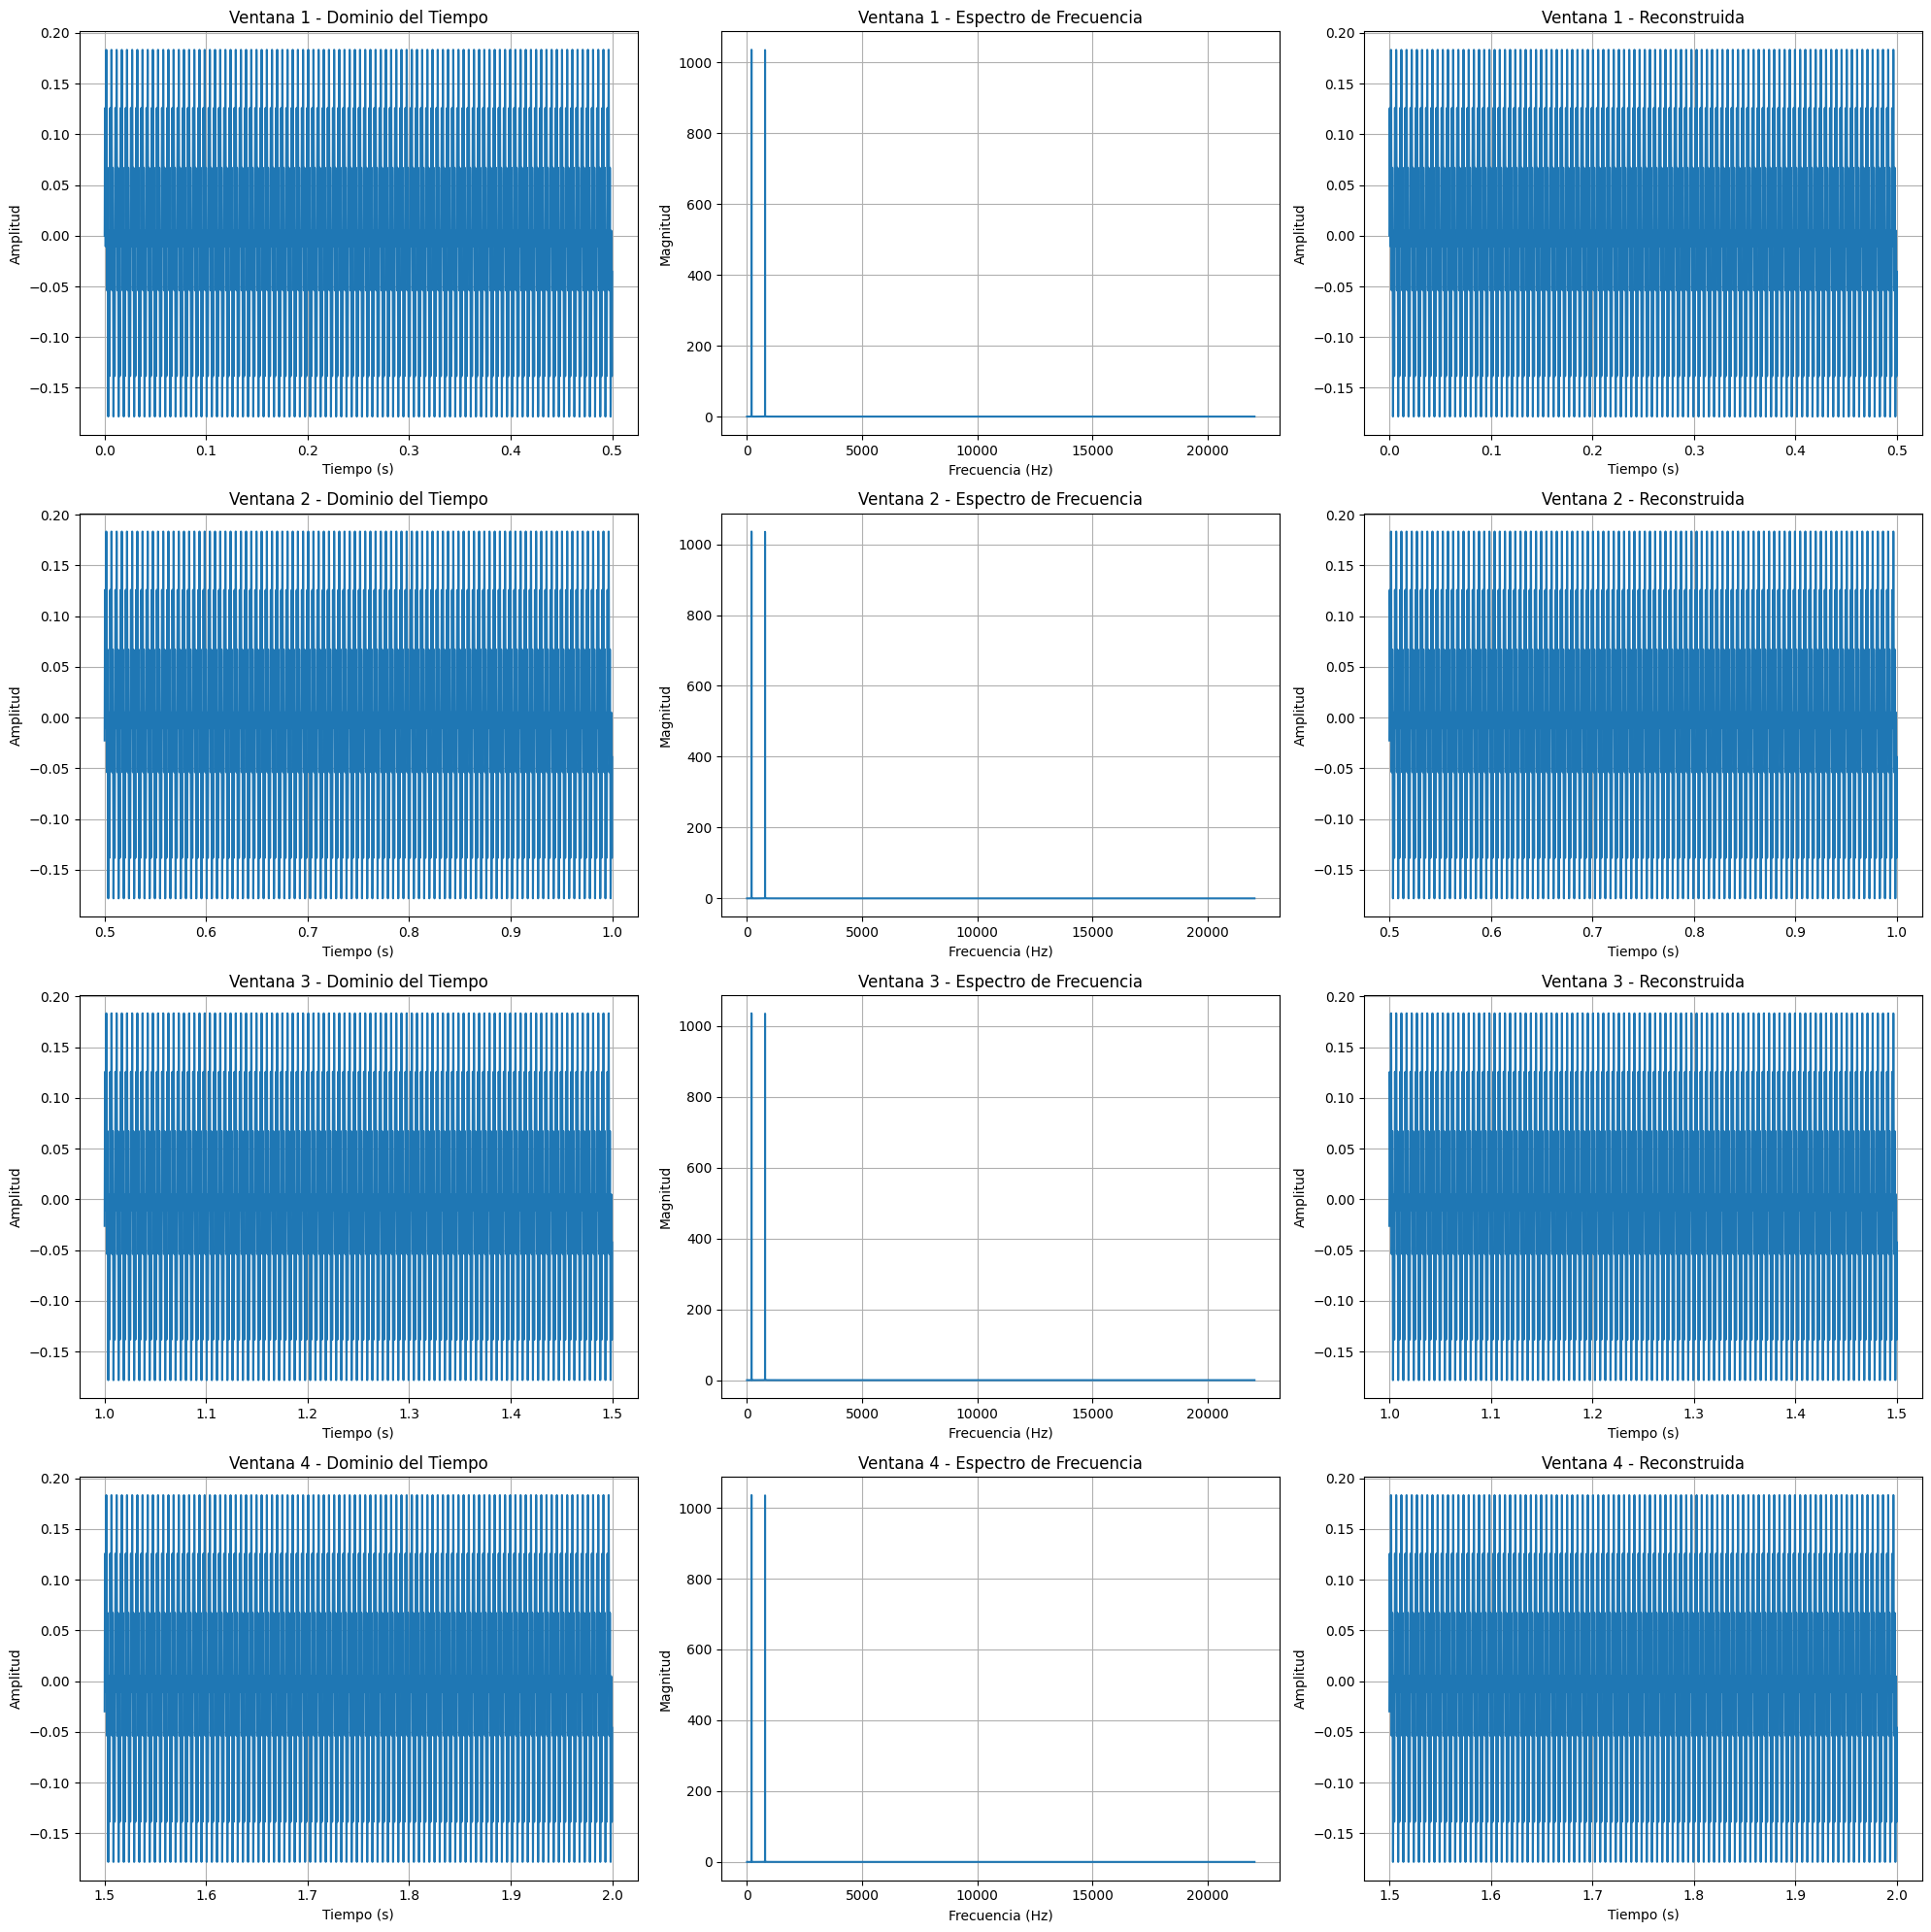

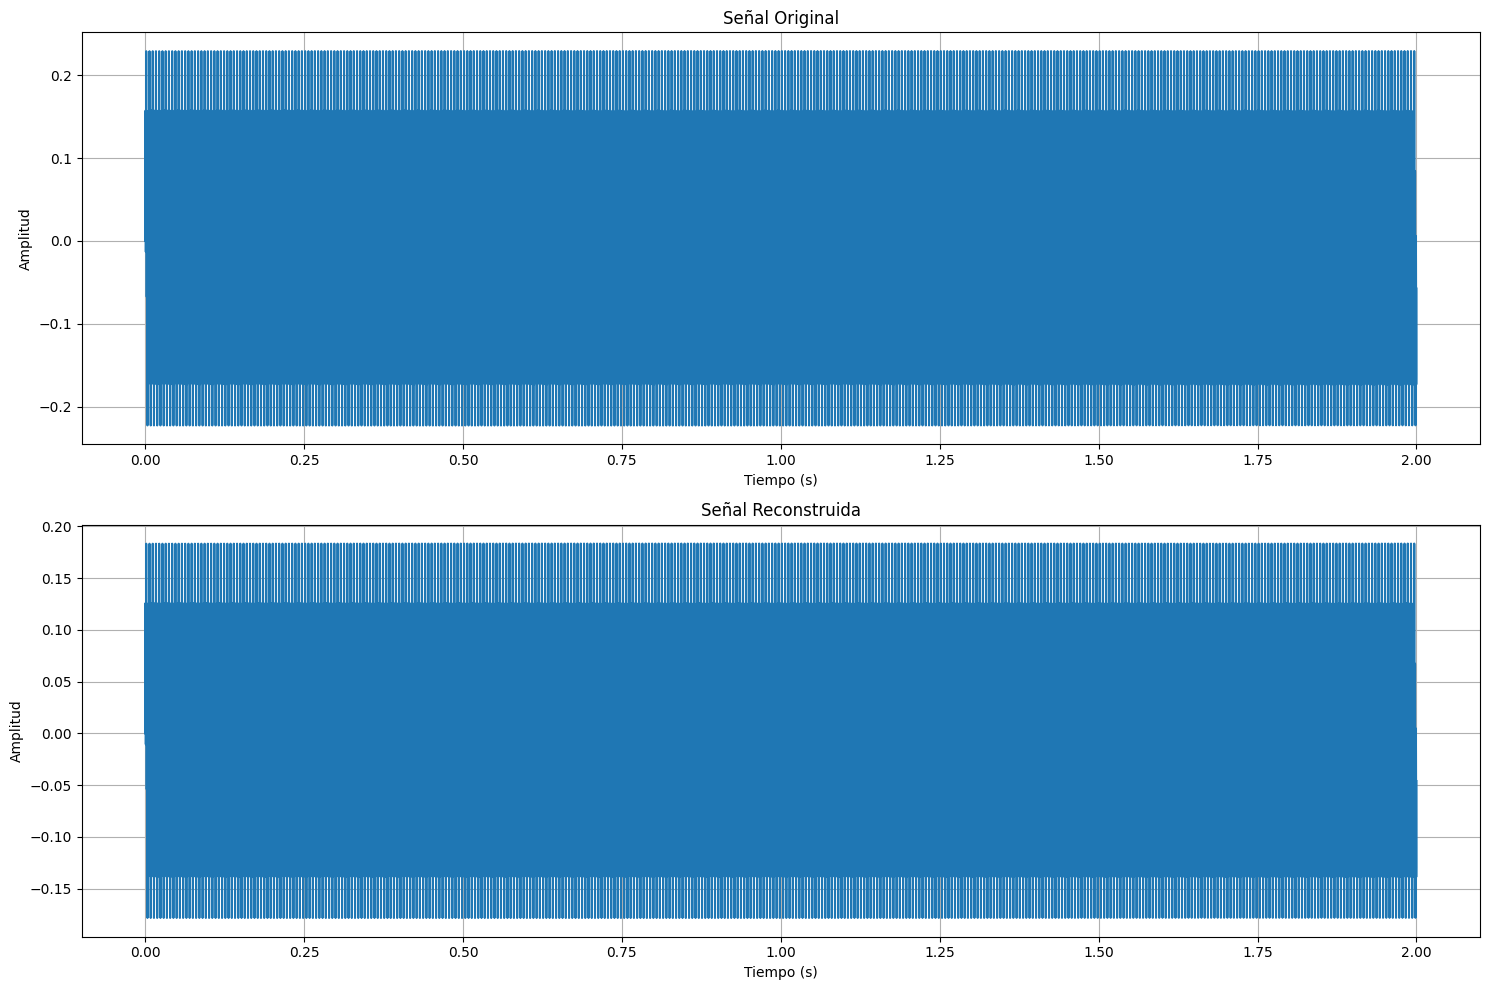

In [49]:
import numpy as np
from google.colab import drive
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Cargar audio
audio_path = "/content/drive/MyDrive/Data_Augmentation/JUAN/AUDIO_DATA_AUGM/AudioPuro/dos_f_test.wav"
sr, audio = wavfile.read(audio_path)
audio = audio.astype(float) / np.iinfo(audio.dtype).max

# Parámetros
window_time = 0.5
window_size = int(window_time * sr)
alpha = 0.8

# Dividir en ventanas
n_windows = len(audio) // window_size
windows = []
for i in range(n_windows):
    start = i * window_size
    end = start + window_size
    windows.append(audio[start:end, 0])  # Tomar solo el canal izquierdo

# Procesar cada ventana
processed_windows = []
plt.figure(figsize=(20, 5*n_windows))

for i, window in enumerate(windows):
    # Aplicar factor alpha
    modified_window = window * alpha

    # Calcular FFT
    fft_result = np.fft.fft(modified_window)

    # Calcular IFFT
    ifft_result = np.fft.ifft(fft_result)

    processed_windows.append(ifft_result)

    # Visualizar proceso para cada ventana
    plt.subplot(n_windows, 3, 3*i + 1)
    plt.title(f'Ventana {i+1} - Dominio del Tiempo')
    plt.plot(np.arange(len(window))/sr + i*window_time, modified_window)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.subplot(n_windows, 3, 3*i + 2)
    plt.title(f'Ventana {i+1} - Espectro de Frecuencia')
    freqs = np.fft.fftfreq(len(fft_result), 1/sr)
    plt.plot(freqs[:len(freqs)//2], np.abs(fft_result)[:len(freqs)//2])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.grid(True)

    plt.subplot(n_windows, 3, 3*i + 3)
    plt.title(f'Ventana {i+1} - Reconstruida')
    plt.plot(np.arange(len(ifft_result))/sr + i*window_time, np.real(ifft_result))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Reconstruir señal final
reconstructed = np.concatenate(processed_windows)

# Visualizar señal final
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.title('Señal Original')
plt.plot(np.arange(len(audio))/sr, audio[:, 0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('Señal Reconstruida')
plt.plot(np.arange(len(reconstructed))/sr, np.real(reconstructed))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()